# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 6</font>

Documentação SQLite: http://www.sqlite.org/docs.html

### Acessando Banco de Dados com Python

In [1]:
# Reemove o arquivo com o banco de dados SQLite (caso exista)
import os
os.remove("escola.db") if os.path.exists("escola.db") else None

In [2]:
# Importando o módulo de acesso ao SQLite
import sqlite3

In [3]:
# Cria uma conexão com o banco de dados. 
# Se o banco de dados não existir, ele é criado neste momento.
con = sqlite3.connect('escola.db')

In [4]:
type(con)

sqlite3.Connection

In [5]:
# Criando um cursor 
# (Um cursor permite percorrer todos os registros em um conjunto de dados)
cur = con.cursor()

In [6]:
type(cur)

sqlite3.Cursor

In [7]:
# Cria uma instrução sql
sql_create = 'create table cursos '\
'(id integer primary key, '\
'titulo varchar(100), '\
'categoria varchar(140))'

In [8]:
# Executando a instrução sql no cursor
cur.execute(sql_create)

In [9]:
# Criando outra sentença SQL para inserir registros
sql_insert = 'insert into cursos values (?, ?, ?)'

In [10]:
# Dados
recset = [(1000, 'Ciência de Dados', 'Data Science'),
          (1001, 'Big Data Fundamentos', 'Big Data'),
          (1002, 'Python Fundamentos', 'Análise de Dados')]

In [11]:
# Inserindo os registros
for rec in recset:
    cur.execute(sql_insert, rec)

In [12]:
# Grava a transação
con.commit()

In [13]:
# Criando outra sentença SQL para selecionar registros
sql_select = 'select * from cursos'

In [14]:
# Seleciona todos os registros e recupera os registros
cur.execute(sql_select)
dados = cur.fetchall()

# fetchall(): Pega todos os registros para salvar no objeto dados

In [16]:
# Mostra
for linha in dados:
    print ('Curso Id: %d, Título: %s, Categoria: %s \n' % linha)

Curso Id: 1000, Título: Ciência de Dados, Categoria: Data Science 

Curso Id: 1001, Título: Big Data Fundamentos, Categoria: Big Data 

Curso Id: 1002, Título: Python Fundamentos, Categoria: Análise de Dados 



In [17]:
# Gerando outros registros
recset = [(1003, 'Gestão de Dados com MongoDB', 'Big Data'),
          (1004, 'R Fundamentos', 'Análise de Dados')]

# Inserindo os registros
for rec in recset:
    cur.execute(sql_insert, rec)
    
# Gravando a transação
con.commit()

In [18]:
# Seleciona todos os registros
cur.execute('select * from cursos')

# Recupera os resultados
recset = cur.fetchall()

# Mostra
for rec in recset:
    print ('Curso Id: %d, Título: %s, Categoria: %s \n' % rec)

Curso Id: 1000, Título: Ciência de Dados, Categoria: Data Science 

Curso Id: 1001, Título: Big Data Fundamentos, Categoria: Big Data 

Curso Id: 1002, Título: Python Fundamentos, Categoria: Análise de Dados 

Curso Id: 1003, Título: Gestão de Dados com MongoDB, Categoria: Big Data 

Curso Id: 1004, Título: R Fundamentos, Categoria: Análise de Dados 



In [19]:
# Fecha a conexão
con.close()

### Criando o Banco de Dados e Inserindo Dados

In [1]:
# Reemove o arquivo com o banco de dados SQLite (caso exista)
import os
os.remove("dsa.db") if os.path.exists("dsa.db") else None

In [2]:
import sqlite3
 
# Criando uma conexão
conn = sqlite3.connect('dsa.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2020-05-02 14:32:11', 'Teclado', 90 )")
    conn.commit()
    c.close()
    conn.close()

In [3]:
# Criar tabela
create_table()

In [4]:
# Inserir dados
data_insert()

### Inserindo Dados com Variáveis

In [5]:
import sqlite3
import random
import time
import datetime
 
# Criando uma conexão
conn = sqlite3.connect('dsa.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES('2020-05-02 12:34:45', 'Teclado', 130.00 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", (new_date, new_prod_name, new_valor))
    conn.commit()

In [6]:
# Gerando valores e inserindo na tabela
for i in range(10):
    data_insert_var()
    time.sleep(1)

In [7]:
# Encerrando a conexão
c.close()
conn.close()

### Leitura de dados

In [8]:
import sqlite3
import random
import time
import datetime
 
# Criando uma conexão
conn = sqlite3.connect('dsa.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')

# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(002, '02-05-2020', 'teclado', 130 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])         


In [9]:
# Select nos dados
leitura_todos_dados()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(11, '2022-04-05 10:53:49.354320', 'Monitor', 58.0)
(12, '2022-04-05 10:53:50.380618', 'Monitor', 91.0)
(13, '2022-04-05 10:53:51.395715', 'Monitor', 55.0)
(14, '2022-04-05 10:53:52.413940', 'Monitor', 63.0)
(15, '2022-04-05 10:53:53.430957', 'Monitor', 61.0)
(16, '2022-04-05 10:53:54.453217', 'Monitor', 93.0)
(17, '2022-04-05 10:53:55.477457', 'Monitor', 99.0)
(18, '2022-04-05 10:53:56.498050', 'Monitor', 56.0)
(19, '2022-04-05 10:53:57.512149', 'Monitor', 51.0)
(20, '2022-04-05 10:53:58.526716', 'Monitor', 98.0)


In [10]:
# Leitura de registros específicos
leitura_registros()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(12, '2022-04-05 10:53:50.380618', 'Monitor', 91.0)
(14, '2022-04-05 10:53:52.413940', 'Monitor', 63.0)
(15, '2022-04-05 10:53:53.430957', 'Monitor', 61.0)
(16, '2022-04-05 10:53:54.453217', 'Monitor', 93.0)
(17, '2022-04-05 10:53:55.477457', 'Monitor', 99.0)
(20, '2022-04-05 10:53:58.526716', 'Monitor', 98.0)


In [11]:
# Leitura de colunas específicas
leitura_colunas()

90.0
58.0
91.0
55.0
63.0
61.0
93.0
99.0
56.0
51.0
98.0


In [12]:
# Encerrando a conexão
c.close()
conn.close()

### Update e Delete

In [13]:
import sqlite3
import random
import time
import datetime
 
# Criando uma conexão
conn = sqlite3.connect('dsa.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
      
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(002, '02-05-2020', 'teclado', 130 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 70.0")
    for linha in c.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])  
        
# Update
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.00 WHERE valor = 98.0")
    conn.commit()
    
# Delete
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 62.0")
    conn.commit()

In [14]:
atualiza_dados()

In [15]:
leitura_todos_dados()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(11, '2022-04-05 10:53:49.354320', 'Monitor', 58.0)
(12, '2022-04-05 10:53:50.380618', 'Monitor', 91.0)
(13, '2022-04-05 10:53:51.395715', 'Monitor', 55.0)
(14, '2022-04-05 10:53:52.413940', 'Monitor', 63.0)
(15, '2022-04-05 10:53:53.430957', 'Monitor', 61.0)
(16, '2022-04-05 10:53:54.453217', 'Monitor', 93.0)
(17, '2022-04-05 10:53:55.477457', 'Monitor', 99.0)
(18, '2022-04-05 10:53:56.498050', 'Monitor', 56.0)
(19, '2022-04-05 10:53:57.512149', 'Monitor', 51.0)
(20, '2022-04-05 10:53:58.526716', 'Monitor', 70.0)


In [16]:
remove_dados()

In [17]:
leitura_todos_dados()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(11, '2022-04-05 10:53:49.354320', 'Monitor', 58.0)
(12, '2022-04-05 10:53:50.380618', 'Monitor', 91.0)
(13, '2022-04-05 10:53:51.395715', 'Monitor', 55.0)
(14, '2022-04-05 10:53:52.413940', 'Monitor', 63.0)
(15, '2022-04-05 10:53:53.430957', 'Monitor', 61.0)
(16, '2022-04-05 10:53:54.453217', 'Monitor', 93.0)
(17, '2022-04-05 10:53:55.477457', 'Monitor', 99.0)
(18, '2022-04-05 10:53:56.498050', 'Monitor', 56.0)
(19, '2022-04-05 10:53:57.512149', 'Monitor', 51.0)
(20, '2022-04-05 10:53:58.526716', 'Monitor', 70.0)


### Gráficos

In [18]:
# Instala a versão exata do pacote matplotlib
!pip install -q -U matplotlib

# !: Cria o gráfico dentro do brownser, não abre em outra janela.

In [19]:
import matplotlib as mat
mat.__version__

'3.5.1'

In [20]:
import sqlite3
import random
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook
 
# Criando uma conexão
conn = sqlite3.connect('dsa.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
     
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(now, 'Teclado', 130 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])  
        
# Update
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.00 WHERE valor > 80.0")
    conn.commit()
    
# Delete
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 62.0")
    conn.commit()

# Gerar gráfico com os dados no banco de dados
def dados_grafico():
    c.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
        
    plt.bar(ids, valores)
    plt.show()

<IPython.core.display.Javascript object>


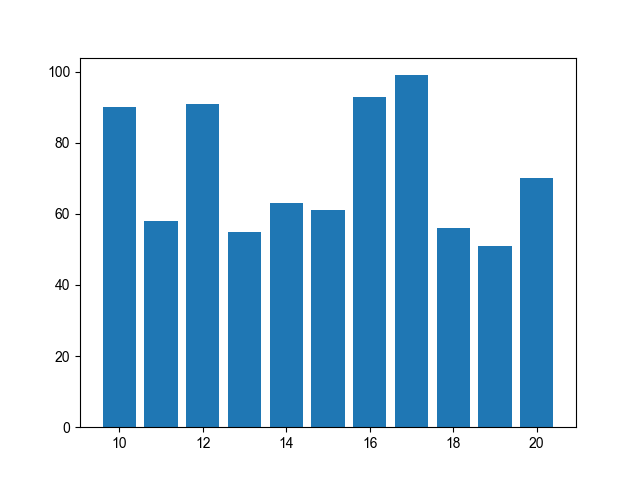

In [22]:
# Gerando gráficos
dados_grafico()

### Gravando Dados no MongoDB com PyMongo

In [23]:
# Instala o pacote pymongo para conectar no banco de dados MongoDB
!pip install -q pymongo

# !: Instala o comando no ssitema operacional

In [24]:
# Importamos o MongoClient para conectar nossa aplicação ao MongoDB
from pymongo import MongoClient

In [25]:
# Estabelecemos a conexão ao Banco de Dados
conn = MongoClient('localhost', 27017)

In [26]:
type(conn)

pymongo.mongo_client.MongoClient

In [27]:
# Uma única instância do MongoDB pode suportar diversos bancos de dados. 
# Vamos criar o banco de dados cadastrodb
db = conn.cadastrodb

In [28]:
type(db)

pymongo.database.Database

In [29]:
# Uma coleção é um grupo de documentos armazenados no MongoDB 
# (relativamente parecido com o conceito de tabelas em bancos relacionais)
collection = db.cadastrodb

In [30]:
type(collection)

pymongo.collection.Collection

Uma nota importante sobre coleções (e bancos de dados) no MongoDB é que eles são criados posteriormente - nenhum dos comandos acima executou efetivamente qualquer operação no servidor MongoDB. Coleções e bancos de dados são criados quando o primeiro documento é inserido.

In [31]:
import datetime

Dados no MongoDB são representados (e armazenados) usando documentos JSON (Java Script Object Notation). Com o PyMongo usamos dicionários para representar documentos.

In [32]:
post1 = {"codigo": "ID-9987725",
        "prod_name": "Geladeira",
        "marcas": ["brastemp", "consul", "elecrolux"],
        "data_cadastro": datetime.datetime.utcnow()}

In [33]:
type(post1)

dict

In [34]:
collection = db.posts

In [35]:
post_id = collection.insert_one(post1)

In [36]:
post_id.inserted_id

ObjectId('624c70369a51916f76e2e81f')

In [37]:
# Quando um documento é inserido uma chave especial, "_id", é adicionada 
# automaticamente se o documento ainda não contém uma chave "_id".
post_id

In [38]:
post2 = {"codigo": "ID-2209876",
        "prod_name": "Televisor",
        "marcas": ["samsung", "panasonic", "lg"],
        "data_cadastro": datetime.datetime.utcnow()}

In [39]:
collection = db.posts

In [40]:
post_id = collection.insert_one(post2).inserted_id

In [41]:
post_id

ObjectId('624c703b9a51916f76e2e820')

In [42]:
collection.find_one({"prod_name": "Televisor"})

{'_id': ObjectId('624c703b9a51916f76e2e820'),
 'codigo': 'ID-2209876',
 'prod_name': 'Televisor',
 'marcas': ['samsung', 'panasonic', 'lg'],
 'data_cadastro': datetime.datetime(2022, 4, 5, 16, 37, 14, 261000)}

In [43]:
# A função find() retorna um cursor e podemos então navegar pelos dados
for post in collection.find():
    print(post)

{'_id': ObjectId('624c70369a51916f76e2e81f'), 'codigo': 'ID-9987725', 'prod_name': 'Geladeira', 'marcas': ['brastemp', 'consul', 'elecrolux'], 'data_cadastro': datetime.datetime(2022, 4, 5, 16, 37, 7, 530000)}
{'_id': ObjectId('624c703b9a51916f76e2e820'), 'codigo': 'ID-2209876', 'prod_name': 'Televisor', 'marcas': ['samsung', 'panasonic', 'lg'], 'data_cadastro': datetime.datetime(2022, 4, 5, 16, 37, 14, 261000)}


In [44]:
# Verificando o nome do banco de dados
db.name

'cadastrodb'

In [45]:
# Listando as coleções disponíveis
# db.collection_names()
db.list_collection_names()

['posts']

### Retornando Dados no MongoDB com PyMongo

In [49]:
# Importamos o Módulo PyMongo
import pymongo

In [50]:
# Criando a conexão com o MongoDB (neste caso, conexão padrão)
client_con = pymongo.MongoClient()

In [51]:
# Listando os bancos de dados disponíveis
# client_con.database_names()
client_con.list_database_names()

['admin', 'cadastrodb', 'config', 'local']

In [52]:
# Definindo o objeto db
# Objeto que vamos nos conectar: Neste caso cadastrodb
db = client_con.cadastrodb

In [53]:
# Listando as coleções disponíveis
# db.collection_names()
db.list_collection_names()

['posts']

In [54]:
# Criando uma coleção
db.create_collection("mycollection")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'cadastrodb'), 'mycollection')

In [55]:
# Listando as coleções disponíveis
# db.collection_names()
db.list_collection_names()

['mycollection', 'posts']

In [56]:
# Inserindo um documento na coleção criada
db.mycollection.insert_one({
   'titulo': 'MongoDB com Python', 
   'descricao': 'MongoDB é um Banco de Dados NoSQL',
   'by': 'Data Science Academy',
   'url': 'http://www.datascienceacademy.com.br',
   'tags': ['mongodb', 'database', 'NoSQL'],
   'likes': 100
})

In [57]:
# Retornando o documento criado
db.mycollection.find_one()

{'_id': ObjectId('624c72019a51916f76e2e823'),
 'titulo': 'MongoDB com Python',
 'descricao': 'MongoDB é um Banco de Dados NoSQL',
 'by': 'Data Science Academy',
 'url': 'http://www.datascienceacademy.com.br',
 'tags': ['mongodb', 'database', 'NoSQL'],
 'likes': 100}

In [58]:
# Preparando um documento
doc1 = {"Nome":"Donald","sobrenome":"Trump","twitter":"@POTUS"}

In [59]:
# Inserindo um documento
db.mycollection.insert_one(doc1)

In [60]:
# Preparando um documento
doc2 = {"Site":"http://www.datascienceacademy.com.br",
        "facebook":"facebook.com/dsacademybr"}

In [61]:
# Inserindo um documento
db.mycollection.insert_one(doc2)

In [62]:
# Retornando os documentos na coleção
for rec in db.mycollection.find():
    print(rec)

{'_id': ObjectId('624c72019a51916f76e2e823'), 'titulo': 'MongoDB com Python', 'descricao': 'MongoDB é um Banco de Dados NoSQL', 'by': 'Data Science Academy', 'url': 'http://www.datascienceacademy.com.br', 'tags': ['mongodb', 'database', 'NoSQL'], 'likes': 100}
{'_id': ObjectId('624c72149a51916f76e2e824'), 'Nome': 'Donald', 'sobrenome': 'Trump', 'twitter': '@POTUS'}
{'_id': ObjectId('624c722f9a51916f76e2e825'), 'Site': 'http://www.datascienceacademy.com.br', 'facebook': 'facebook.com/dsacademybr'}


In [63]:
# Conectando a uma coleção
col = db["mycollection"]

In [64]:
type(col)

pymongo.collection.Collection

In [65]:
# Contando os documentos em uma coleção
# col.count()
col.estimated_document_count()

3

In [66]:
# Encontrando um único documento
redoc = col.find_one()

In [67]:
redoc

{'_id': ObjectId('624c72019a51916f76e2e823'),
 'titulo': 'MongoDB com Python',
 'descricao': 'MongoDB é um Banco de Dados NoSQL',
 'by': 'Data Science Academy',
 'url': 'http://www.datascienceacademy.com.br',
 'tags': ['mongodb', 'database', 'NoSQL'],
 'likes': 100}

## Mini-Projeto 1 - Guia de Análise Exploratória de Dados com Python e Linguagem SQL

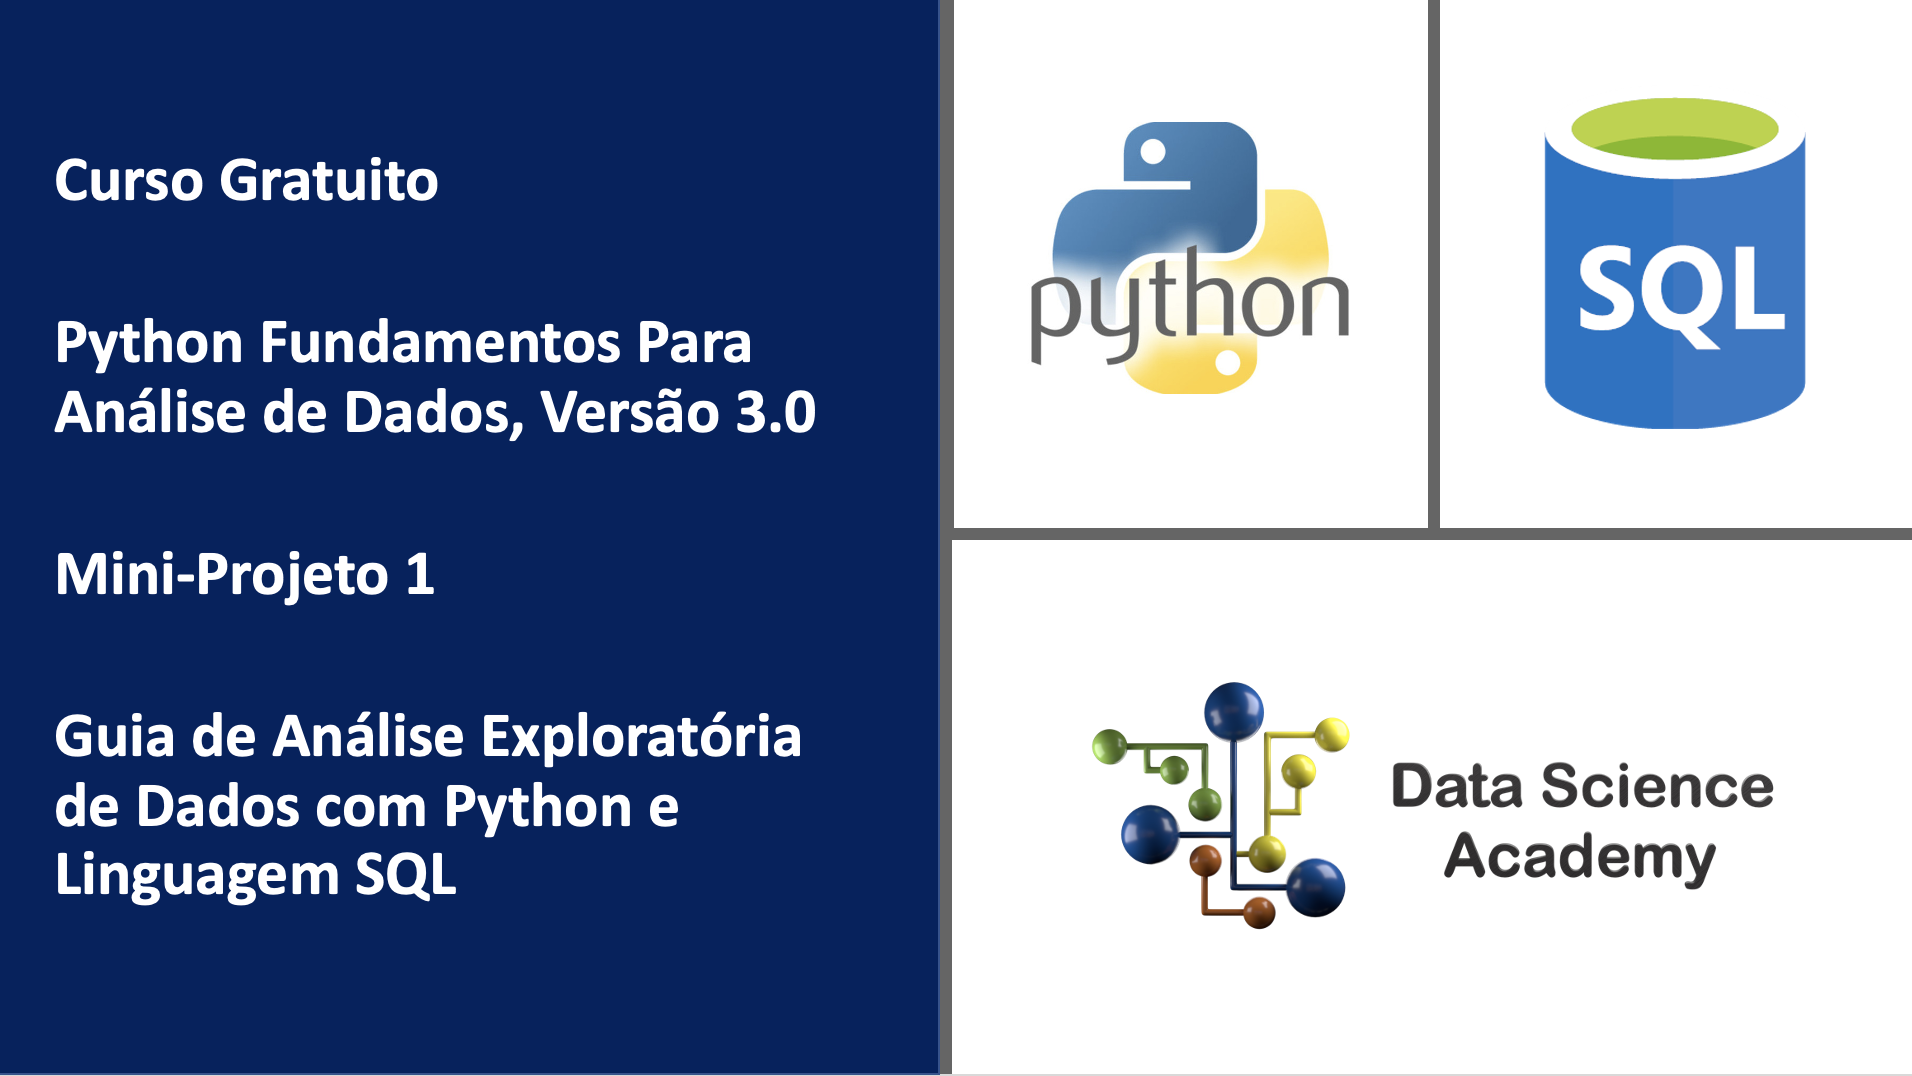

In [9]:
from IPython.display import Image
Image(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap06\Notebooks\imagens\mini-projeto1.png')

Neste Mini-Projeto vamos apresentar um guia básico de análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Usaremos dados reais disponíveis publicamente, dados sobre filmes no <a href="https://www.imdb.com/interfaces/">IMDB</a>.

Guias avançados de Análise Exploratória de Dados são fornecidos na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>.

Para aprender mais sobre Linguagem SQL:

- <a href="https://www.datascienceacademy.com.br/path-player?courseid=microsoft-power-bi-para-data-science">SQL Analytics Básico</a>
- <a href="https://www.datascienceacademy.com.br/course/modelagem-de-banco-de-dados-relacionais-nao-relacionais-e-data-stores">SQL Analytics Avançado</a>

Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:

- 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2- Qual o Número de Títulos Por Gênero?
- 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7- Qual a Relação Entre Duração e Gênero?
- 8- Qual o Número de Filmes Produzidos Por País?
- 9- Quais São os Top 10 Melhores Filmes?
- 10- Quais São os Top 10 Piores Filmes?

## Instalando e Carregando Pacotes

https://pypi.org/

https://pypi.org/project/imdb-sqlite/

In [68]:
# Instala o pacote
!pip install -q imdb-sqlite

Agora executamos o pacote para download dos datasets.

In [69]:
# Instala o pacote
# https://pypi.org/project/pycountry/
!pip install -q pycountry

In [70]:
# Imports
import re #Pacote de expressões regulares (principalmente para processar texto)
import time #Pacote para medir tempo de execução ou trabalhar com datas
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

## Carregando os Dados

Primeiro temos que baixar os dados!

In [73]:
%%time
!imdb-sqlite

# %%time: Comando Jupyter. Medir o tempo de execução desta célula

Wall time: 47min 3s


2022-04-05 16:24:36,355 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads\name.basics.tsv.gz
2022-04-05 16:27:29,679 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads\title.basics.tsv.gz
2022-04-05 16:29:38,663 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads\title.akas.tsv.gz
2022-04-05 16:34:19,793 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads\title.principals.tsv.gz
2022-04-05 16:43:29,088 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads\title.episode.tsv.gz
2022-04-05 16:44:16,458 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads\title.ratings.tsv.gz
2022-04-05 16:44:31,006 Populating database: imdb.db
2022-04-05 16:44:31,015 Applying schema
2022-04-05 16:44:31,038 Importing file: downloads\name.basics.tsv.gz
2022-04-05 16:44:31,038 Reading number of rows ...
2022-04-05 16:44:37,430 Inserting rows into table: people

 11%|#         | 1263313/11533557 [00:16<02:06, 81246.54 rows/s]


 25%|##4       | 2829926/11533557 [00:37<01:43, 83901.20 rows/s]


100%|##########| 11533557/11533557 [02:28<00:00, 77755.89 rows/s]
2022-04-05 16:47:05,791 Importing file: downloads\title.basics.tsv.gz
2022-04-05 16:47:05,791 Reading number of rows ...
2022-04-05 16:47:10,454 Inserting rows into table: titles

 43%|####2     | 3793553/8824341 [00:59<01:21, 61926.55 rows/s]


100%|##########| 8824341/8824341 [02:16<00:00, 64619.19 rows/s]
2022-04-05 16:49:27,022 Importing file: downloads\title.akas.tsv.gz
2022-04-05 16:49:27,023 Reading number of rows ...
2022-04-05 16:49:36,278 Inserting rows into table: akas

 53%|#####2    | 16727254/31640090 [03:02<02:37, 94832.93 rows/s]


100%|##########| 31640090/31640090 [05:39<00:00, 93277.01 rows/s]
2022-04-05 16:55:15,489 Importing file: downloads\title.principals.tsv.gz
2022-04-05 16:55:15,489 Reading number of rows ...
2022-04-05 16:55:28,003 Inserting rows into table: crew

 12%|#2        | 6203906/49755277 [00:52<06:14, 116387.82 rows/s]


 48%|####7     | 23798004/49755277 [03:23<03:44, 115419.37 rows/s]


100%|##########| 49755277/49755277 [07:05<00:00, 116806.45 rows/s]
2022-04-05 17:02:33,972 Importing file: downloads\title.episode.tsv.gz
2022-04-05 17:02:33,973 Reading number of rows ...
2022-04-05 17:02:34,986 Inserting rows into table: episodes

 71%|#######   | 4692909/6618573 [00:34<00:13, 143931.27 rows/s]


100%|##########| 6618573/6618573 [00:47<00:00, 138090.61 rows/s]
2022-04-05 17:03:22,919 Importing file: downloads\title.ratings.tsv.gz
2022-04-05 17:03:22,919 Reading number of rows ...
2022-04-05 17:03:23,074 Inserting rows into table: ratings

100%|##########| 1230952/1230952 [00:10<00:00, 120800.50 rows/s]
2022-04-05 17:03:33,269 Creating table indices ...
2022-04-05 17:11:29,653 Import successful


In [74]:
# Conecta no banco de dados
conn = sqlite3.connect("imdb.db")

In [75]:
# Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [76]:
# Tipo do objeto
type(tabelas)

pandas.core.frame.DataFrame

In [77]:
# Visualiza o resultado
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [78]:
# Vamos converter o dataframe em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [79]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




> Agora começamos a Análise Exploratória dos Dados.

## 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?

Quais são os principais tipos (categorias) dos títulos (filmes)?

In [80]:
# Cria a consulta SQL
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type''' 

In [81]:
# Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [82]:
# Visualiza o resultado
display(resultado1)

,type,COUNT
0,movie,606395
1,short,863404
2,tvEpisode,6616225
3,tvMiniSeries,42849
4,tvMovie,135614
5,tvPilot,2
6,tvSeries,223071
7,tvShort,10512
8,tvSpecial,36476
9,video,258969


In [83]:
# Vamos calcular o percentual para cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [84]:
# Visualiza o resultado
display(resultado1)

,type,COUNT,percentual
0,movie,606395,6.871845
1,short,863404,9.784345
2,tvEpisode,6616225,74.976987
3,tvMiniSeries,42849,0.485577
4,tvMovie,135614,1.536817
5,tvPilot,2,0.000023
6,tvSeries,223071,2.527905
7,tvShort,10512,0.119125
8,tvSpecial,36476,0.413357
9,video,258969,2.934712


In [85]:
# Vamos criar um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Cria um dicionário vazio
others = {}

# Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajusta o nome
others['type'] = 'others'

In [86]:
# Visualiza
others

{'COUNT': 738317, 'percentual': 8.36682308627919, 'type': 'others'}

In [87]:
# Filtra o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [88]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)

In [89]:
# Ordena o resultado
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [90]:
# Visualiza
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6616225,74.976987
1,short,863404,9.784345
3,others,738317,8.366823
0,movie,606395,6.871845


In [91]:
# Ajusta os labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

<IPython.core.display.Javascript object>


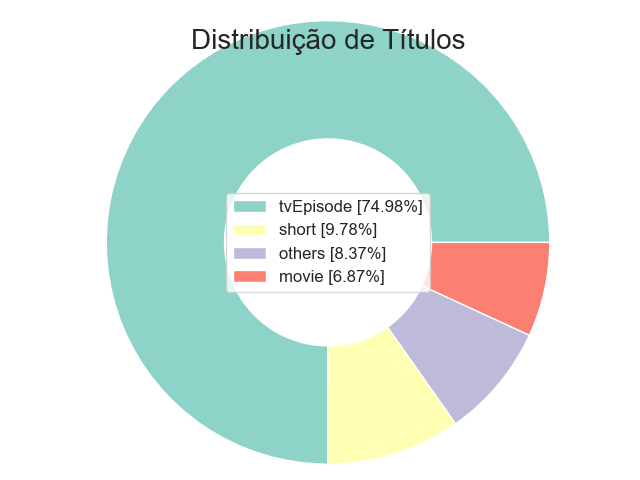

In [95]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 1.5, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

## 2- Qual o Número de Títulos Por Gênero?

Vamos calcular o número de filmes por gênero e entregar o resultado em valor percentual.

In [96]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 

In [97]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [98]:
# Visualiza o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,13949
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1451,"Thriller,Western",44
1452,War,1290
1453,"War,Western",14
1454,Western,5158


In [99]:
# Converte as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [100]:
# Remove valores NA (ausentes)
temp = resultado2['genres'].dropna()

Usamos o Countvectorizer para converter a coluna de gêneros em um vetor one-hot encoded para contar o número de filmes em cada gênero.

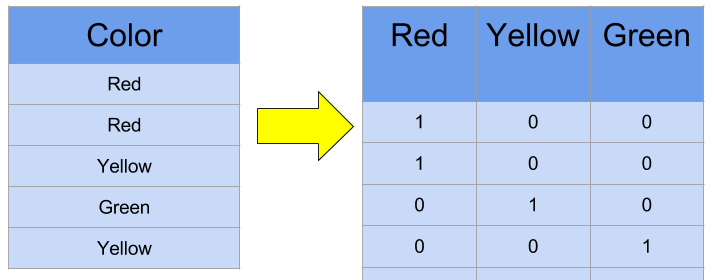

In [12]:
from IPython.display import Image
Image(r'C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\Cursos\Introdução ao Python - DSA\PythonFundamentos-master\Cap06\Notebooks\imagens\one-hot.png')

In [101]:
# Vamos criar um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [102]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [103]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [104]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [105]:
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names()

In [106]:
# Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [107]:
# Visualiza
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1456 non-null   int64
 1   adult        1456 non-null   int64
 2   adventure    1456 non-null   int64
 3   animation    1456 non-null   int64
 4   biography    1456 non-null   int64
 5   comedy       1456 non-null   int64
 6   crime        1456 non-null   int64
 7   documentary  1456 non-null   int64
 8   drama        1456 non-null   int64
 9   family       1456 non-null   int64
 10  fantasy      1456 non-null   int64
 11  film-noir    1456 non-null   int64
 12  game-show    1456 non-null   int64
 13  history      1456 non-null   int64
 14  horror       1456 non-null   int64
 15  music        1456 non-null   int64
 16  musical      1456 non-null   int64
 17  mystery      1456 non-null   int64
 18  n            1456 non-null   int64
 19  news         1456 non-null   int64
 20  reality-

In [108]:
# Drop da coluna n
generos = generos.drop(columns = 'n', axis = 0)

In [109]:
# Calcula o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [110]:
# Visualiza
generos_percentual.head(10)

drama          18.131868
comedy         16.826923
documentary    15.796703
adventure      14.766484
action         14.423077
romance        13.324176
crime          13.186813
mystery        12.568681
thriller       12.293956
fantasy        12.156593
dtype: float64

<IPython.core.display.Javascript object>


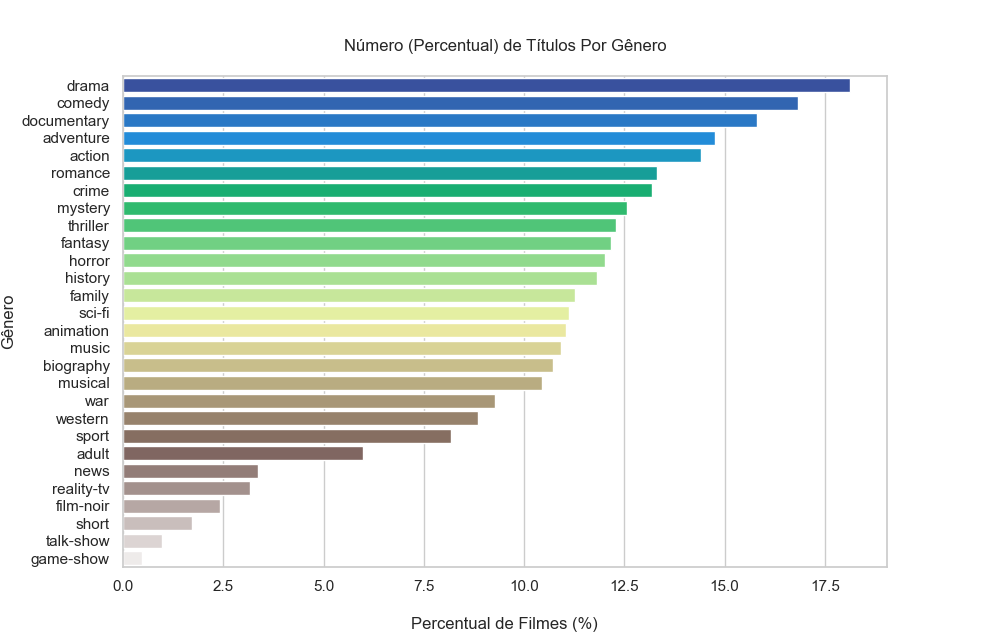

In [112]:
# Plot
plt.figure(figsize = (10,5))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

## 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?

Mediana de avaliação dos filmes.

In [113]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ''' 

In [114]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [115]:
# Visualiza
display(resultado3)

,rating,genres
0,4.5,\N
1,6.0,"Action,Adventure,Biography"
2,4.6,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
276774,5.8,Thriller
276775,6.4,"Drama,History"
276776,3.6,"Adventure,History,War"
276777,8.3,Drama


In [116]:
# Vamos criar uma função para retornar os genêros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [117]:
# Aplica a função
generos_unicos = retorna_generos(resultado3)

In [118]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [119]:
# Cria listas vazias
genero_counts = []
genero_ratings = []

In [120]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [121]:
# Prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [122]:
# Visualiza
df_genero_ratings.head(20)

,genres,count,rating
0,action,28632,5.8
1,adult,4361,5.9
2,adventure,17384,6.0
3,animation,4758,6.6
4,biography,8418,7.0
5,comedy,68502,6.0
6,crime,23626,6.1
7,documentary,41209,7.3
8,drama,122573,6.3
9,family,10693,6.3


In [123]:
# Drop do índice 18 (news)
# Não queremos essa informação como gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [124]:
# Ordena o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

<IPython.core.display.Javascript object>


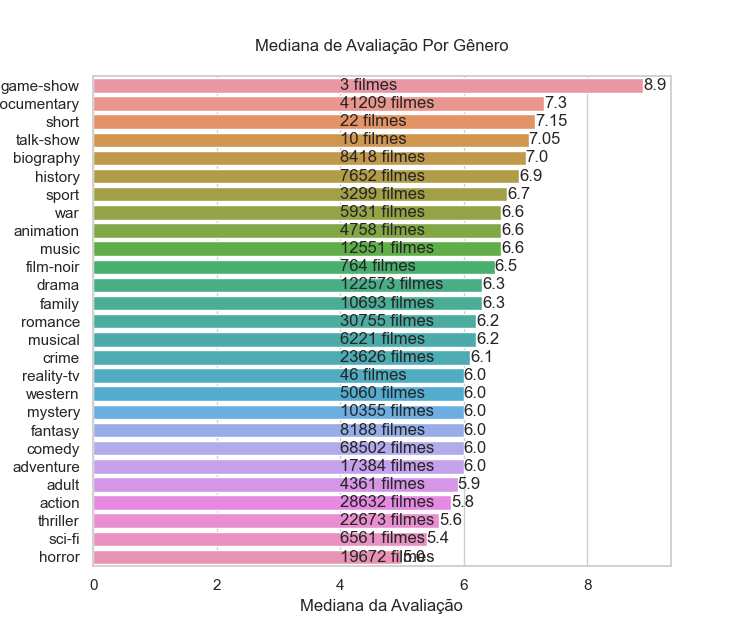

In [127]:
# Plot

# Figura
plt.figure(figsize = (12,7))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

## 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?

Mediana de avaliação dos filmes.

In [128]:
# Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            ''' 

In [129]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [130]:
display(resultado4)

,Rating,premiered
0,6.2,1896
1,4.5,1897
2,4.0,1899
3,3.7,1899
4,6.0,1900
...,...,...
276774,9.2,2022
276775,5.4,2022
276776,6.0,2022
276777,5.1,2022


In [131]:
# Calculamos a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [132]:
type(ratings)

list

In [133]:
ratings[1:10]

[4.5, 3.85, 5.85, 6.3, 3.5, 4.6, 5.3, 4.5, 3.6]

In [134]:
# Lista de anos
anos = list(set(resultado4['premiered']))

In [135]:
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

<IPython.core.display.Javascript object>


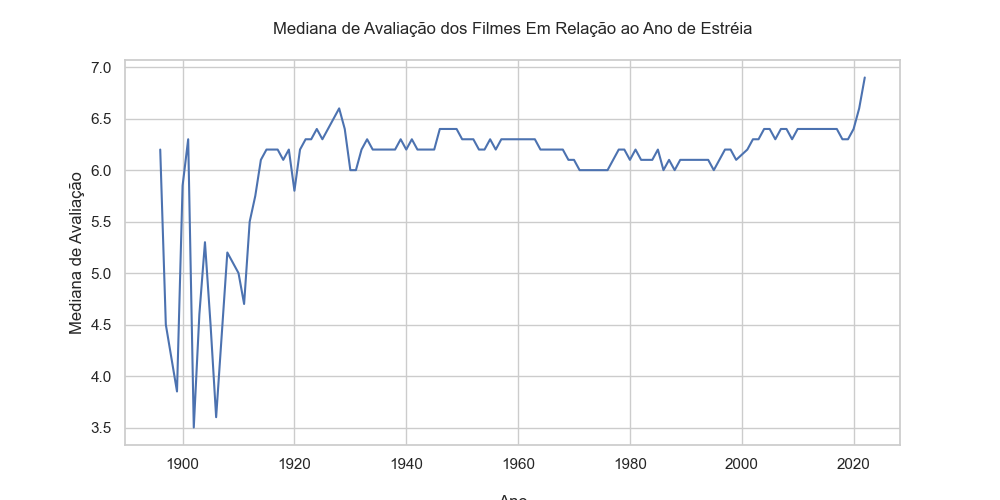

In [138]:
# Plot
plt.figure(figsize = (10,5))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

## 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?

Número de filmes por gênero. Vamos listar os Top 5.

In [139]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles ''' 

In [140]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [141]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8824336,"Action,Drama,Family"
8824337,"Action,Drama,Family"
8824338,"Action,Drama,Family"
8824339,Short


In [142]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [143]:
# Visualiza o resultado
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [144]:
# Agora fazemos a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [145]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [146]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n'] #Filtra tudo que não é gênero n
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

<IPython.core.display.Javascript object>


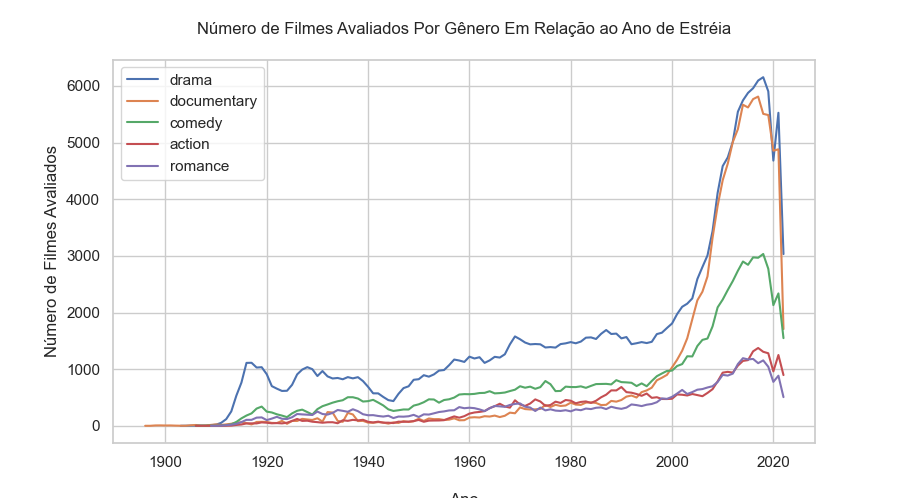

In [148]:
# Plot

# Figura
plt.figure(figsize = (10,5))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

## 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.

Percentis e filme mais longo da história.

In [149]:
# Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ''' 

In [150]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [151]:
display(resultado6)

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
381612,123
381613,57
381614,100
381615,116


In [152]:
# Loop para cálculo dos percentis
for i in range(101): 
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 51.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 58.0
11 percentil da duração (runtime) é: 59.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 63.0
17 percentil da duração (runtime) é: 65.0
18 percentil da duração (runtime) é: 66.0
19 percentil da duração (runtime) é: 68.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 72.0
24 

In [153]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            ''' 

In [154]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [155]:
resultado6

,Runtime,primary_title
0,51420,Logistics


'Logistics' é o filme mais longo da história (até este momento), com 857 horas (51420 minutos). Dirigido por Daniel Andersson e Erika Magnusson, o filme acompanha todo o ciclo de vida de um pedômetro (dispositivo de rastreamento de passos) em ordem cronológica reversa.

## 7- Qual a Relação Entre Duração e Gênero?

Relação entre duração do filme e gênero.

In [156]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            '''

In [157]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [158]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado7)

In [159]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [160]:
# Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [161]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [162]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [163]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

<IPython.core.display.Javascript object>


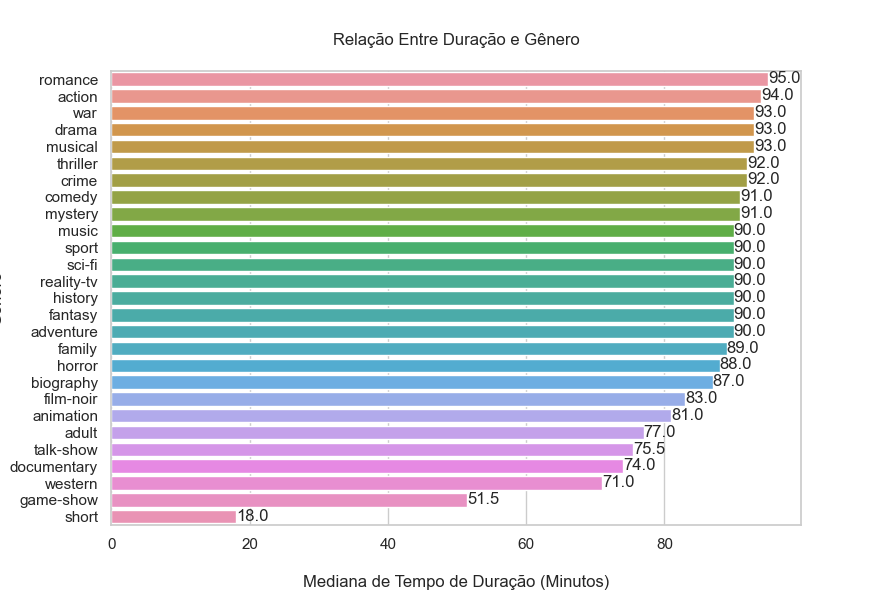

In [165]:
# Plot

# Tamanho da figura
plt.figure(figsize = (10,5))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

## 8- Qual o Número de Filmes Produzidos Por País?

Número de filmes produzidos por país.

In [166]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [167]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [168]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,6142
2,AF,112
3,AG,12
4,AL,1280
...,...,...
229,YUCS,153
230,ZA,3210
231,ZM,15
232,ZRCD,2


In [169]:
# Shape
resultado8.shape

(234, 2)

In [170]:
# Número de linhas
resultado8.shape[0]

234

In [171]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [172]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [173]:
# Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [174]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [175]:
# Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,309809
65,United Kingdom,159128
96,Japan,91199
63,France,84481
89,India,80664
32,Canada,77315
47,Germany,70604
26,Brazil,65315
93,Italy,65189
58,Spain,65181


<IPython.core.display.Javascript object>


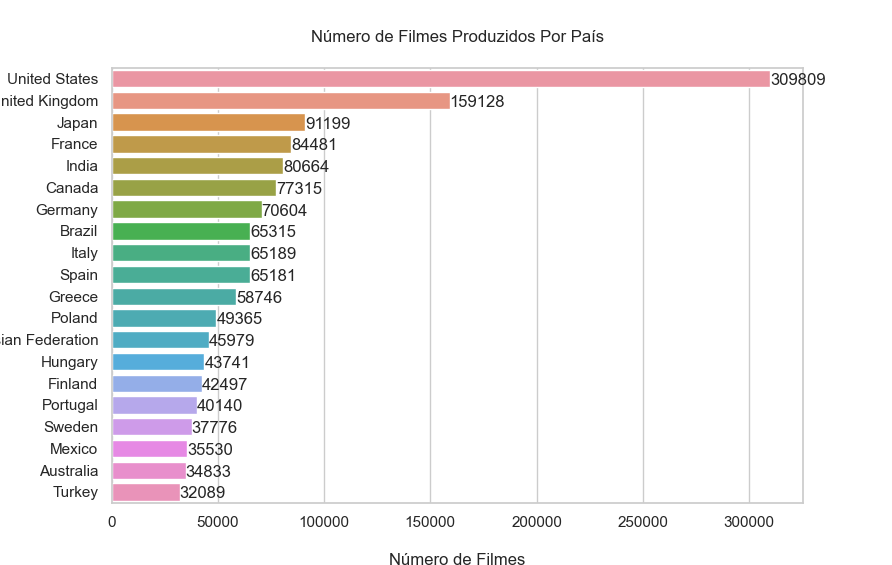

In [176]:
# Plot

# Figura
plt.figure(figsize = (10,5))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

## 9- Quais São os Top 10 Melhores Filmes?

Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [177]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            '''

In [178]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [179]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,Jai Bhim,"Crime,Drama,Mystery",9.4
1,The Shawshank Redemption,Drama,9.3
2,The Chaos Class,"Comedy,Drama",9.3
3,Soorarai Pottru,Drama,9.3
4,Mirror Game,"Crime,Mystery,Thriller",9.3
5,The Godfather,"Crime,Drama",9.2
6,CM101MMXI Fundamentals,"Comedy,Documentary",9.2
7,The Dark Knight,"Action,Crime,Drama",9.1
8,12 Angry Men,"Crime,Drama",9.0
9,The Godfather: Part II,"Crime,Drama",9.0


## 10- Quais São os Top 10 Piores Filmes?

Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [180]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [181]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [182]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Cumali Ceber,Comedy,1.1
1,Sadak 2,"Action,Drama",1.1
2,Smolensk,"Drama,Thriller",1.2
3,The Cost of Deception,"Crime,Drama,History",1.6
4,Reis,"Biography,Drama",1.6
5,Justin Bieber: Never Say Never,"Documentary,Music",1.7
6,Manos: The Hands of Fate,Horror,1.9
7,Radhe,"Action,Crime,Thriller",1.9
8,Disaster Movie,"Comedy,Sci-Fi",1.9
9,The Hottie & the Nottie,"Comedy,Romance",2.0
